# **Data Science and Business Analytics Task 2**

Prediction using Decision Tree Algorithm


**Name: Srijan Gupta**

**Organization: The Sparks Foundation**

**GRIPNOV20**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import seaborn as sns
%matplotlib inline

In [15]:
iris=sns.load_dataset('iris')
df=iris.drop('species',axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
y=datasets.load_iris().target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
y.shape

(150,)

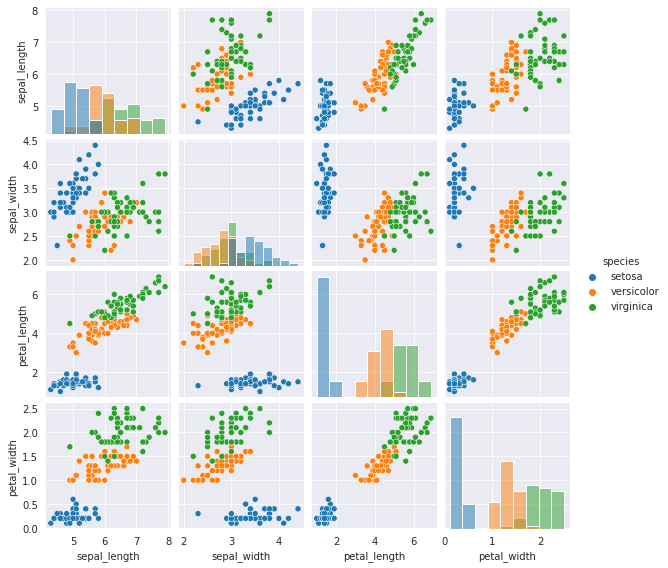

In [39]:

sns.pairplot(data=iris,hue='species',kind='scatter',diag_kind='hist',aspect=1,height=2)

In [20]:
X=df.values
X.shape

(150, 4)

In [26]:
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [29]:
tree_basic_model=make_pipeline(StandardScaler(),DecisionTreeClassifier(criterion='gini'))
score=cross_val_score(tree_basic_model,X,y,cv=5)
print("Average accuracy is",score.mean())

Average accuracy is 0.9666666666666668


In [30]:
criteria = ["gini", "entropy"]      #criteria to be tested
min_sample_split_range = [2,10, 20] #min sample split to be tested
max_depth_range = [None, 2, 5, 10]  #max depth to be tested
min_samples_leaf_range = [1, 5, 10] #min samples in the leaf to be tested
min_leaf_nodes_range = [None, 5, 10, 20]    #min leaf nodes to be tested

param_grid = {"criterion": criteria,
              "min_samples_split": min_sample_split_range,
              "max_depth": max_depth_range,
              "min_samples_leaf": min_samples_leaf_range,
              "max_leaf_nodes": min_leaf_nodes_range
                }

grid = GridSearchCV(estimator=DecisionTreeClassifier(), 
                    param_grid=param_grid, 
                    cv = 5, 
                    scoring='accuracy', 
                    refit=True)
tree_model=make_pipeline(StandardScaler(),grid)
tree_model.fit(X,y)
print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)

Accuracy of the tuned model: 0.9733
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


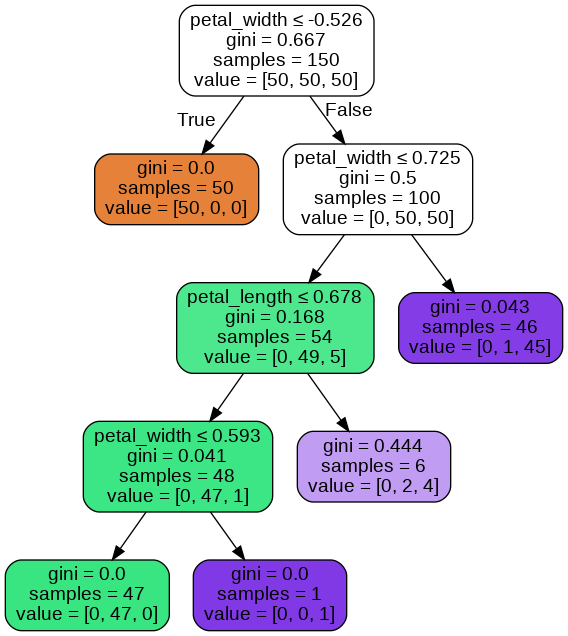

In [41]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(grid.best_estimator_, out_file=dot_data, feature_names=df.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())